# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [2]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node23:
    def __init__(self, is_leaf=True):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf

class NodeAVL:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class BTreeNode:
    def __init__(self, keys=None, children=None, parent=None):

        self.keys = keys if keys is not None else []
        self.children = children if children is not None else []
        self.parent = parent

    def get_keys(self):
        return self.keys

    def get_children(self):
        return self.children

    def get_parent(self):
        return self.parent
    

Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [3]:
class TwoThreeTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None
        self.split_count = 0

    def searchElement(self, key):
        if self.root is None:
            return False
        else:
            return self.search_recursively(self.root,key)

    def insertElement(self, key):
        if self.root is None:
            self.root = Node23(is_leaf=True)
            self.root.keys.append(key)
            return True
        success, promotion = self.insert_recursively(self.root, key)
        if not success:
            return False
        if promotion is not None: # deal with the root
            self.split_count += 1
            mid_key, new_left, new_right = promotion
            new_root = Node23(is_leaf=False)
            new_root.keys.append(mid_key)
            new_root.children = [new_left, new_right]
            self.root = new_root
        return True

    def calculate_height(self):
        if self.root is None:
            return 0
        return self.calculate_recursively(self.root)

    def get_split_frequency(self):
        return self.split_count

    def insert_recursively(self, node, key):
        if key in node.keys:
            return (False, None)

        if node.is_leaf :
            self.insert_to_left(node, key)
            if len(node.keys) > 2:
                self.split_count += 1
                promotion = self.split_leaf(node)
                return (True, promotion)
            return (True, None)
        else :
            children_index = self.find_children_index(node,key)
            success, promotion = self.insert_recursively(node.children[children_index],key)
            if not success:
                return (False, None)
            if promotion is not None: #deal with the parent node in each lays
                self.split_count += 1
                mid_key,new_left,new_right = promotion
                self.merge(node,mid_key,new_left,new_right)
                if len(node.keys) > 2:
                    promotion_internal = self.split_internal(node)
                    return (True, promotion_internal)
            return (True, None)

    def split_leaf(self, node):
        mid_key = node.keys[1]
        new_left = Node23(is_leaf=True)
        new_left.keys.append(node.keys[0])
        new_left.children = []
        new_right = Node23(is_leaf=True)
        new_right.keys.append(node.keys[2])
        new_right.children = []
        return mid_key,new_left,new_right

    def split_internal(self, node):
        mid_key = node.keys.pop(1)
        new_left = Node23(is_leaf=False)
        new_left.keys.append(node.keys[0])
        new_left.children =node.children[0:2]
        new_right = Node23(is_leaf=False)
        new_right.keys.append(node.keys[1])
        new_right.children =node.children[2:]
        return mid_key,new_left,new_right

    def merge(self, node, mid_key, new_left, new_right):
        idx = self.find_children_index(node, mid_key)
        node.keys.insert(idx, mid_key)
        node.children[idx] =new_left
        node.children.insert(idx + 1, new_right)

    def insert_to_left(self, node, key):
        idx = 0
        while idx < len(node.keys) and key > node.keys[idx]:
            idx += 1
        node.keys.insert(idx, key)

    def find_children_index(self, node, key):
        idx = 0
        while idx < len(node.keys) and key > node.keys[idx]:
            idx += 1
        return idx

    def search_recursively(self, node, key):
         n = len(node.keys)
         for idx in range(n):
            if node.keys[idx] == key:
                return True
         if node.is_leaf :
            return False
         else:
            children_index = self.find_children_index(node, key)
            return self.search_recursively(node.children[children_index],key)

    def calculate_recursively(self, node):
        if node.is_leaf :
            return 0
        return 1 + self.calculate_recursively(node.children[0])

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [4]:
class AVLTree(AbstractSearchInterface):
    def __init__(self):
        self.root = None

    def getHeight(self, node):
        return node.height if node else 0

    def getBalanceFactor(self, node):
        if not node:
            return 0
        return self.getHeight(node.left) - self.getHeight(node.right)

    def updateHeight(self, node):
        node.height = 1 + max(self.getHeight(node.left), self.getHeight(node.right))

    def leftRotate(self, node):
        rightChild = node.right
        if not rightChild:
            return node  # No rotation needed

        T2 = rightChild.left
        rightChild.left = node
        node.right = T2

        # Update heights
        self.updateHeight(node)
        self.updateHeight(rightChild)

        return rightChild

    def rightRotate(self, node):
        leftChild = node.left
        if not leftChild:
            return node  # No rotation needed

        T2 = leftChild.right
        leftChild.right = node
        node.left = T2

        # Update heights
        self.updateHeight(node)
        self.updateHeight(leftChild)

        return leftChild

    def insertElement(self, key):
        if not self.root:
            self.root = NodeAVL(key)
            return True
        
        # Stack to track the path from root to the insertion point
        stack = []
        node = self.root

        # Iteratively find the insertion point
        while node:
            stack.append(node)
            if key < node.key:
                if not node.left:
                    node.left = NodeAVL(key)
                    break
                node = node.left
            elif key > node.key:
                if not node.right:
                    node.right = NodeAVL(key)
                    break
                node = node.right
            else:
                return False # Duplicate keys not allowed

        # Balance the tree by traversing back up using the stack
        while stack:
            current = stack.pop()
            self.updateHeight(current)

            balance = self.getBalanceFactor(current)

            # Left Heavy Cases
            if balance > 1:
                if key < current.left.key:  # Left-Left Case
                    newRoot = self.rightRotate(current)
                else:  # Left-Right Case
                    current.left = self.leftRotate(current.left)
                    newRoot = self.rightRotate(current)

            # Right Heavy Cases
            elif balance < -1:
                if key > current.right.key:  # Right-Right Case
                    newRoot = self.leftRotate(current)
                else:  # Right-Left Case
                    current.right = self.rightRotate(current.right)
                    newRoot = self.leftRotate(current)

            else:
                newRoot = current  # No rotation needed

            # Update root if necessary
            if not stack:
                self.root = newRoot
            else:
                parent = stack[-1]
                if parent.left == current:
                    parent.left = newRoot
                else:
                    parent.right = newRoot
        return True

    def searchElement(self, key):
        node = self.root
        while node:
            if key == node.key:
                return True
            elif key < node.key:
                node = node.left
            else:
                node = node.right
        return False  # Key not found

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [5]:
class BTree(AbstractSearchInterface):
    """
    max_keys refers to the maximum possible keys held by a node 
    For this BTree implementation we set max_keys arbitrary to 4 by default, however this can be overriden"
    """
    def __init__(self, max_keys=4):
        self.root_node = BTreeNode()
        self.max_keys = max_keys

    def insertElement(self, element):
        inserted = False
        # No need to insert the element if its already present
        if self.searchElement(element):
            return inserted
        self.insert(element, self.root_node)
        return True

    def splitNode(self, node):

        node_keys = node.get_keys()
        node_children = node.get_children()
        mid_idx = len(node_keys) // 2

        left_child_keys = node_keys[:mid_idx]
        median_key = node_keys[mid_idx]
        right_child_keys = node_keys[mid_idx + 1:]

        # Assign children correctly for an internal node
        left_children = node_children[:mid_idx + 1] if node_children else []
        right_children = node_children[mid_idx + 1:] if node_children else []


        left_child = BTreeNode(keys=left_child_keys, children=left_children, parent=None)
        right_child = BTreeNode(keys=right_child_keys, children=right_children, parent=None)

        for child in left_child.get_children():
            child.parent = left_child
        for child in right_child.get_children():
            child.parent = right_child

        #Case 1 : node is root node, thus we create a new node to become the parent node and thus the new root node
        if node == self.root_node:
            new_root = BTreeNode(keys=[median_key], children=[left_child, right_child])
            left_child.parent = new_root
            right_child.parent = new_root
            self.root_node = new_root
            return

        # Case 2: Non-root node, we insert median key into parent node and append the new nodes into parent node's children
        parent = node.get_parent()
        parent_keys = parent.get_keys()
        parent_children = parent.get_children()

        idx = 0
        while idx < len(parent_keys) and parent_keys[idx] < median_key:
            idx += 1

        parent_keys.insert(idx, median_key)

        # Remove the pointer to the split node and insert the two new children.
        parent_children.pop(idx)
        left_child.parent = parent
        right_child.parent = parent
        parent_children.insert(idx, left_child)
        parent_children.insert(idx + 1, right_child)

        # Recursively split the parent if needed.
        if len(parent_keys) >= self.max_keys:
            self.splitNode(parent)

            return  # Exit to prevent crash
    def insert(self, element, node):
        node_children = node.get_children()
        node_keys = node.get_keys()

        # Leaf Node: insert element and split if necessary
        if not node_children:  
            idx = 0
            while idx < len(node_keys) and node_keys[idx] < element:
                idx += 1
            node_keys.insert(idx, element)
            if len(node_keys) >= self.max_keys:
                self.splitNode(node)
            return

        # Find the correct child node
        idx = 0
        while idx < len(node_keys) and node_keys[idx] < element:
            idx += 1

        # Ensure idx does not exceed node_children bounds
        if idx >= len(node_children):
            print(f"Warning: idx {idx} is out of bounds for node_children (size {len(node_children)}).")
            return  # Exit to prevent crash
        
        self.insert(element, node_children[idx])

    def searchElement(self, element):
        return self.search(element, self.root_node)


    def search(self, element, node):

        #Case 1: Element is in current node's keys, we return true immediately
        node_keys = node.get_keys()
        if element in node_keys:
            return True

        #Case 2: Element is not in current node's keys is a leaf node, hence we return false as there are no more children
        node_children = node.get_children()
        if not node_children:
            return False

        #We recursively call search() on the appropriate child node
        idx = 0
        while idx < len(node_keys):
            if node_keys[idx] > element:
                break
            idx += 1

        if idx >= len(node_children):
            return False

        return self.search(element, node_children[idx])

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [6]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a collection of random dataset generators

    '''
    
    #ADD YOUR CODE HERE
    
    def __init__(self):
        pass
        
    def generate_random_string(self, length: int) -> str:
        return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))
    
    def generate_dataset(self, n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings"""
        unique_strings = set()
        while len(unique_strings) < n:
            unique_strings.add(self.generate_random_string(str_length))
        return list(unique_strings)
    
    def load_dataset_from_file(self,file_path: str) -> list[str]:
        """Load a dataset from a file"""
        with open(file_path, 'r') as file:
            dataset = [line.strip() for line in file.readlines()]
        return dataset
    
    def generate_dataset_normal_distribution(self,n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings with a normal distribution"""
        mean = n // 2
        std_dev = n // 4
        dataset = []
        for _ in range(n):
            dataset.append(str(int(random.gauss(mean, std_dev)))) 
        return dataset
    
    def generate_dateset_with_duplicates(self,n: int, str_length: int = 10) -> list[str]:
        """Generate a dataset of n unique random strings with duplicates"""
        dataset = self.generate_dataset(9*n//10, str_length)
        duplicates = random.sample(dataset, n - (9 * n // 10))  # 10% duplicates
        dataset.extend(duplicates)
        return dataset
    
    def generate_sorted_dataset(self,n: int, str_length: int = 10, reverse = False) -> list[str]:
        """Generate a sorted dataset of n unique random strings"""
        """Represent edge cases for the dataset"""
        dataset = self.generate_dataset(n, str_length)
        dataset.sort(reverse=reverse)
        return dataset


        

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [ ]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    '''
    A class to represent a framework for benchmarking and plotting results of different data structures

    To benchmark a single data structure, use the following methods:
    - benchmark_insertion(data_structure, dataset)
    - benchmark_search(data_structure, dataset)
    where data_structure is an instance of the data structure class and dataset is a list of strings.

    dataset is a list of strings, generated by the TestDataGenerator class.
    
    Before benchmarking search, the data structure should be populated with the dataset. A suggested way 
    to do this is to run benchmark_insertion() first, and then run benchmark_search() on the same dataset.
    '''
            
    #ADD YOUR CODE HERE
    
    def __init__(self, data_structure_constructors: list[tuple[str, AbstractSearchInterface]]):
        '''
        Initialize the framework with a list of data structure constructors.
        Each constructor is a tuple (name, constructor_function).
        '''
        self.data_structure_constructors = data_structure_constructors
        
    def benchmark_insertion(self, data_structure, dataset: list[str]) -> float:
        '''
        Benchmark the insertion time of a data structure.
        '''
        start_time = timeit.default_timer()
        for element in dataset:
            data_structure.insertElement(element)
        end_time = timeit.default_timer()
        average_time = (end_time - start_time) / len(dataset)
        return average_time

    def benchmark_insertion_tree_height_split(self, data_structure, dataset: list[str]) -> tuple[int, int]:
        '''
        Benchmark the insertion time of a data structure and return the height of the tree and the number of splits.
        '''
        for element in dataset:
            data_structure.insertElement(element)
        height = data_structure.calculate_height()
        split_count = data_structure.get_split_frequency()
        return height, split_count

    def benchmark_search(self, data_structure, dataset: list[str]) -> tuple[float, float]:
        '''
        Benchmark the search time of a data structure for both existing and non-existing elements.
        '''
        # Search for existing elements
        start_time = timeit.default_timer()
        for element in dataset:
            data_structure.searchElement(element)
        end_time = timeit.default_timer()
        average_existing_search_time = (end_time - start_time) / len(dataset)
        
        # Search for non-existing elements
        non_existing_elements = [f"non_existing_{i}" for i in range(len(dataset))]
        start_time = timeit.default_timer()
        for element in non_existing_elements:
            data_structure.searchElement(element)
        end_time = timeit.default_timer()
        average_non_existing_search_time = (end_time - start_time) / len(non_existing_elements)
        return average_existing_search_time, average_non_existing_search_time

    def do_tests_for_one_data_structure(self, data_structure_constructor, dataset_sizes: list[int], generate_test_dataset) -> tuple[list[int], list[float], list[float], list[float]]:
        '''
        Run the tests for a single data structure.
        '''
        insertion_times = []
        existing_search_times = []
        non_existing_search_times = []
        for size in dataset_sizes:
            # Generate datasets
            dataset = generate_test_dataset(size)
            # Initialize data structure
            data_structure = data_structure_constructor()
            
            # Benchmark insertion
            insertion_time = self.benchmark_insertion(data_structure, dataset)
            
            # Benchmark search
            existing_search_time, non_existing_search_time = self.benchmark_search(data_structure, dataset)
        
            # Store results
            insertion_times.append(insertion_time)
            existing_search_times.append(existing_search_time)
            non_existing_search_times.append(non_existing_search_time)
        return dataset_sizes, insertion_times, existing_search_times, non_existing_search_times

    def do_tests_for_all_data_generators(self, data_structure_constructor, dataset_sizes: list[int]):
        '''
        Run the tests for a single data structure for all data generators.
        results_for_all_datasets is a dictionary with keys "random", "normal", "duplicates", and "sorted".
        Each key contains a list of tuples (dataset_sizes, insertion_times, existing_search_times, non_existing_search_times).
        '''
        results_for_all_datasets = {"random": [], "normal": [], "duplicates": [], "sorted": []}
        data_generator = TestDataGenerator()
        data_generators = {
            "random": data_generator.generate_dataset,
            "normal": data_generator.generate_dataset_normal_distribution,
            "duplicates": data_generator.generate_dateset_with_duplicates,
            "sorted": data_generator.generate_sorted_dataset
        }
        for generator_name, generator_function in data_generators.items():
            results = self.do_tests_for_one_data_structure(data_structure_constructor, dataset_sizes, generator_function)
            results_for_all_datasets[generator_name]=results
        
        return results_for_all_datasets
    
    def plot_results(self, results_for_all_datasets: dict[str, list[tuple[int, float, float, float]]], data_structure_name: str):
        '''
        Do separate plots, not subplots.
        Plot the results for all datasets.
        One separate plot per operation (insertion, existing search, non-existing search).
        Different colors for different datasets.
        '''
        rearraged_results = {"insertion": {}, "existing_search": {}, "non_existing_search": {}}
        for generator_name, results in results_for_all_datasets.items():
            dataset_sizes, insertion_times, existing_search_times, non_existing_search_times = results
            rearraged_results["insertion"][generator_name] = (dataset_sizes, insertion_times)
            rearraged_results["existing_search"][generator_name] = (dataset_sizes, existing_search_times)
            rearraged_results["non_existing_search"][generator_name] = (dataset_sizes, non_existing_search_times)
        # Plotting
        for operation, data in rearraged_results.items():
            plt.figure()
            for generator_name, (dataset_sizes, times) in data.items():
                plt.scatter(dataset_sizes, times, label=generator_name)
            plt.xlabel("Dataset Size")
            plt.xscale("log")
            plt.ylabel(f"Average Time ({operation})")
            plt.title(f"{data_structure_name} - {operation.replace('_', ' ').title()}")
            plt.legend()
            plt.grid()
            plt.show()

    def plot_results_without_outliers(self, results_for_all_datasets: dict[str, list[tuple[int, float, float, float]]], data_structure_name: str, repeated_times = 5):
        filtered_results = {"random": [], "normal": [], "duplicates": [], "sorted": []}
        for generator_name, results in results_for_all_datasets.items():
            dataset_sizes, insertion_times, existing_search_times, non_existing_search_times = results
            filtered_results[generator_name] = (self.remove_outliers(dataset_sizes, repeated_times), self.remove_outliers(insertion_times, repeated_times), self.remove_outliers(existing_search_times, repeated_times), self.remove_outliers(non_existing_search_times, repeated_times))
        self.plot_results(filtered_results, data_structure_name)


    def remove_outliers(self, data: list[float], repeated_times: int) -> list[float]:
        filtered_data = []
        size = len(data)
        for i in range(0, size - repeated_times + 1, repeated_times):
            filtered_data.append(sorted(data[i:i+repeated_times])[1:-1])
        return filtered_data


    
    

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

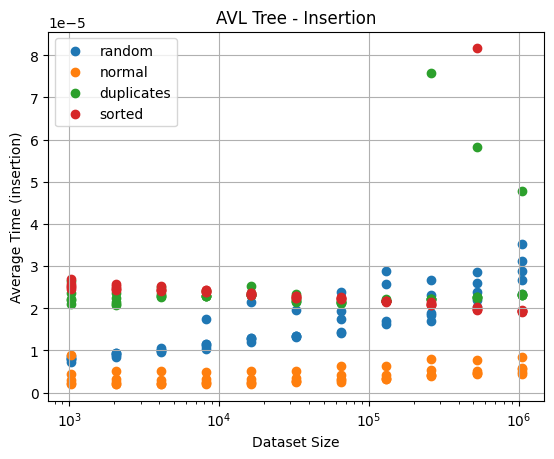

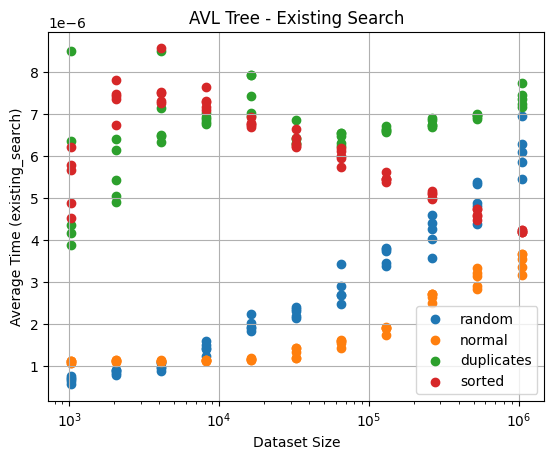

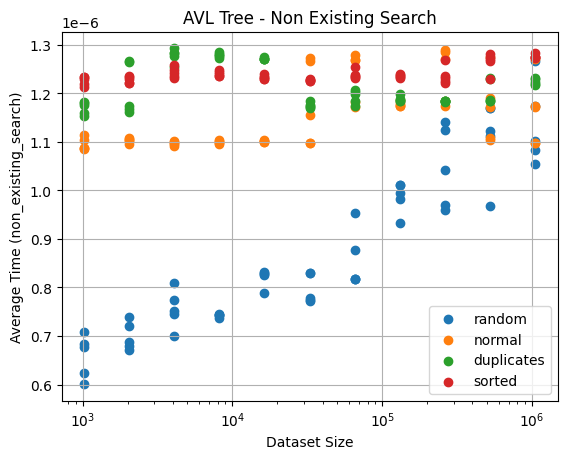

In [ ]:
# ADD YOUR TEST CODE HERE 
test_framework = ExperimentalFramework([("AVL Tree", AVLTree)])
dataset_sizes = [2**x for x in range(10,21)]
for size in dataset_sizes.copy():
    for i in range(1, 5):
        dataset_sizes.append(size + i)
dataset_sizes = sorted(set(dataset_sizes))
results = test_framework.do_tests_for_all_data_generators(AVLTree, dataset_sizes)
test_framework.plot_results(results, "AVL Tree")
        




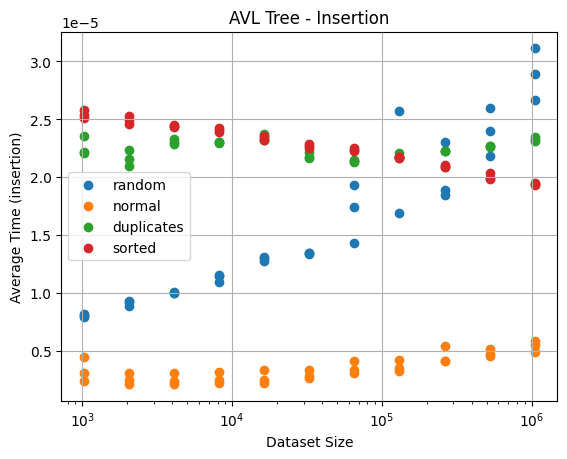

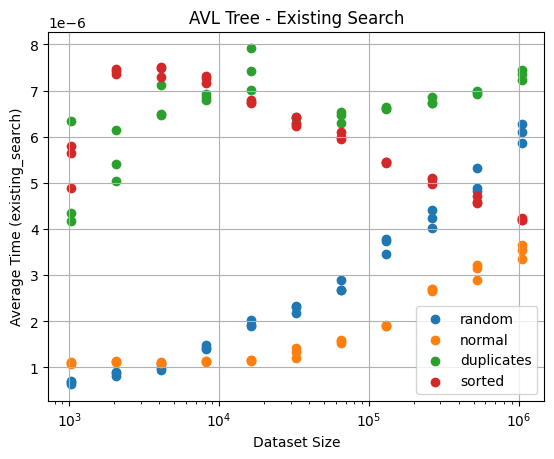

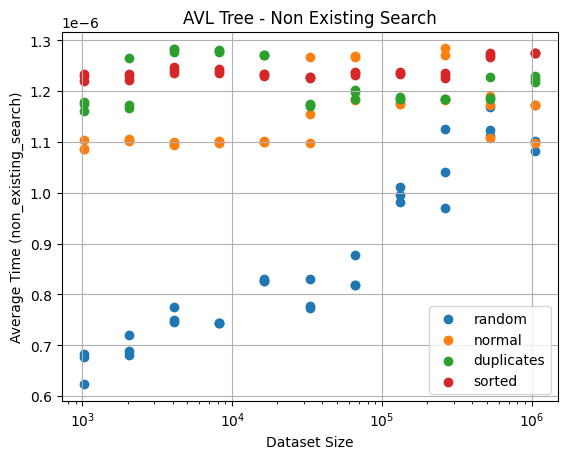

In [9]:
test_framework.plot_results_without_outliers(results, "AVL Tree", repeated_times = 5)

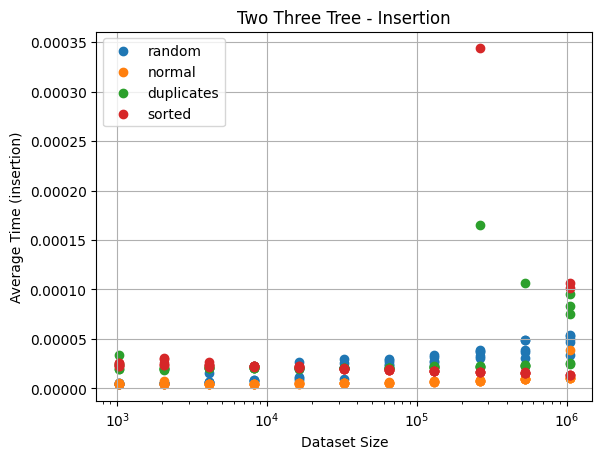

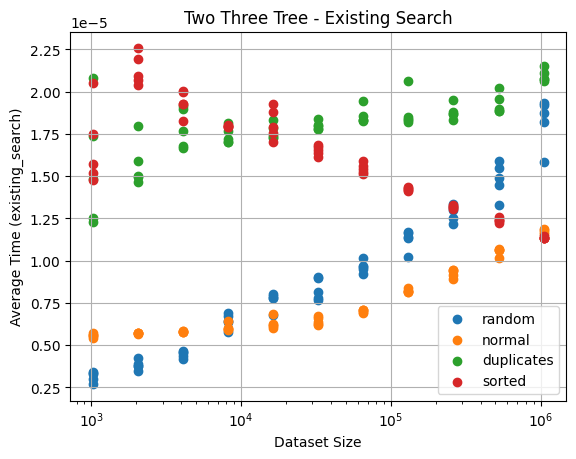

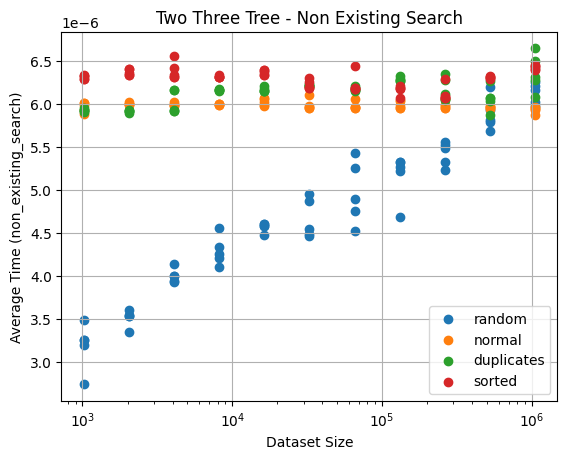

In [ ]:
# ADD YOUR TEST CODE HERE 
test_framework = ExperimentalFramework([("Two Three Tree", TwoThreeTree)])
dataset_sizes = [2**x for x in range(10,21)]
for size in dataset_sizes.copy():
    for i in range(1, 5):
        dataset_sizes.append(size + i)
dataset_sizes = sorted(set(dataset_sizes))
results = test_framework.do_tests_for_all_data_generators(TwoThreeTree, dataset_sizes)
test_framework.plot_results(results, "Two Three Tree")
        

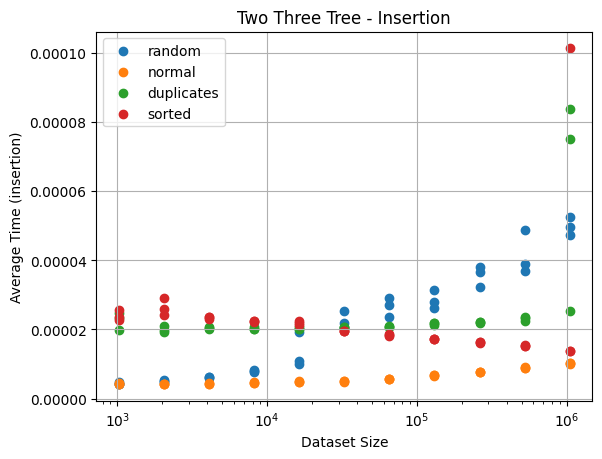

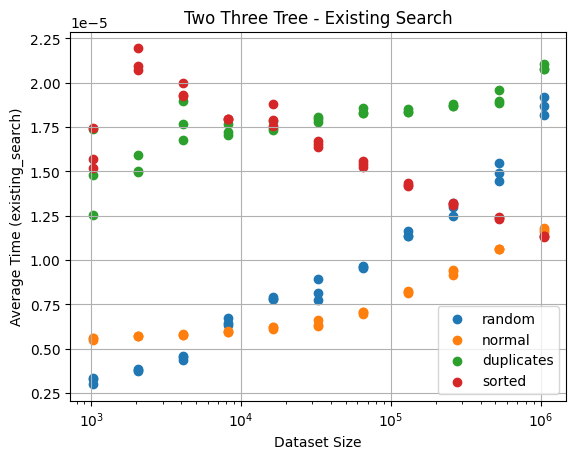

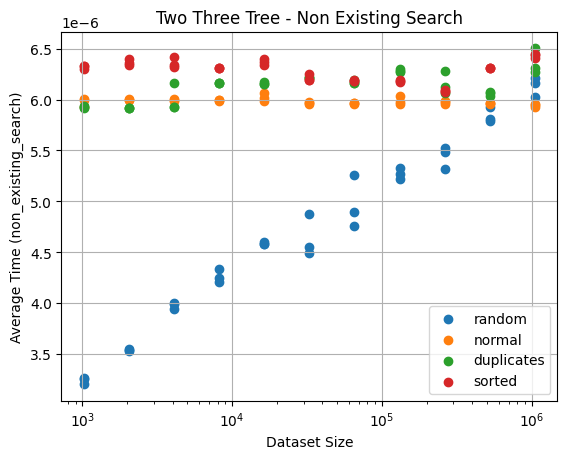

In [9]:
test_framework.plot_results_without_outliers(results, "Two Three Tree", repeated_times = 5)

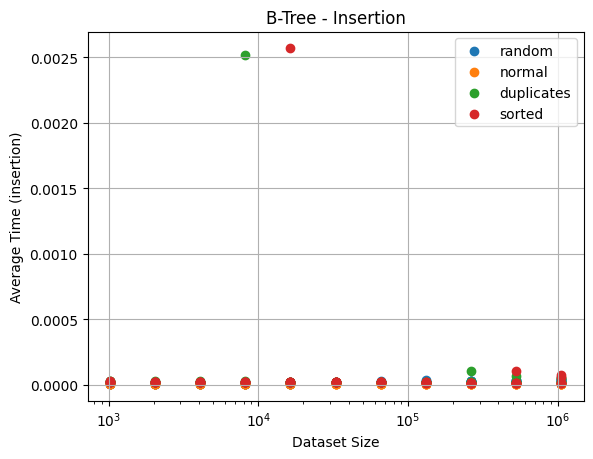

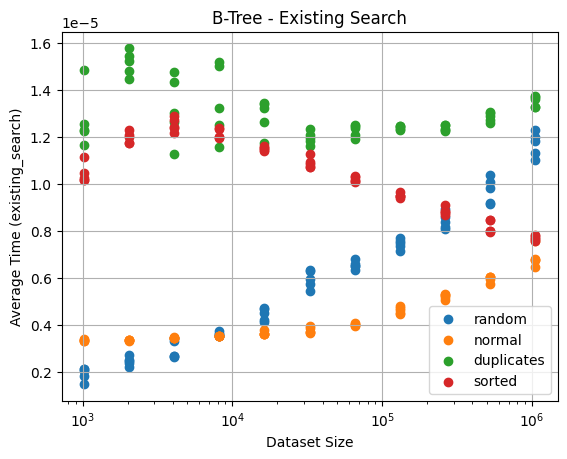

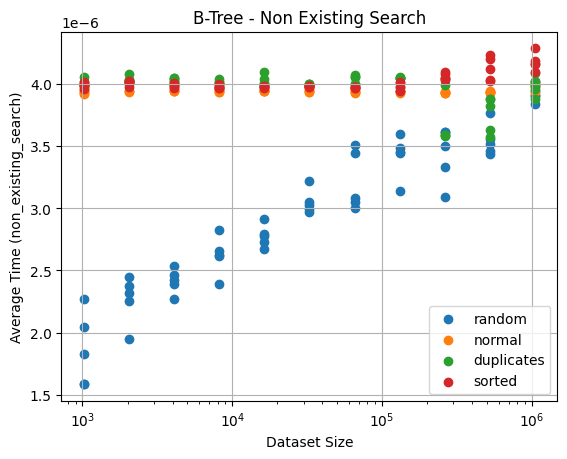

In [ ]:
# ADD YOUR TEST CODE HERE 
test_framework = ExperimentalFramework([("B-Tree", BTree)])
dataset_sizes = [2**x for x in range(10,21)]
for size in dataset_sizes.copy():
    for i in range(1, 5):
        dataset_sizes.append(size + i)
dataset_sizes = sorted(set(dataset_sizes))
results = test_framework.do_tests_for_all_data_generators(BTree, dataset_sizes)
test_framework.plot_results(results, "B-Tree")

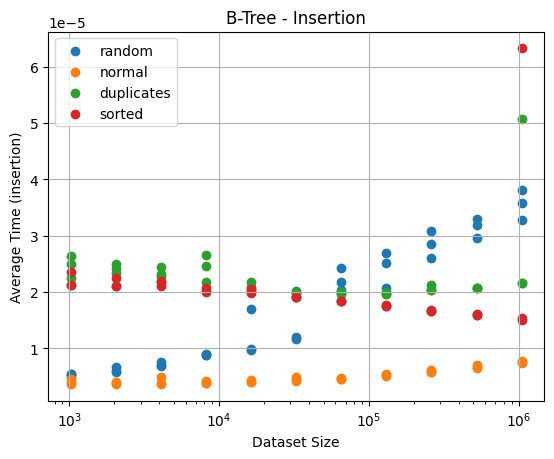

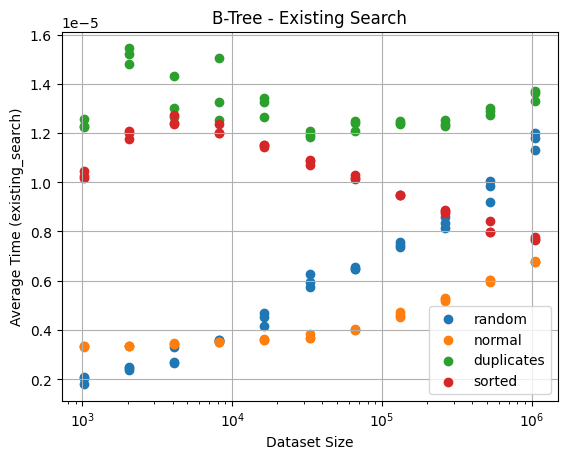

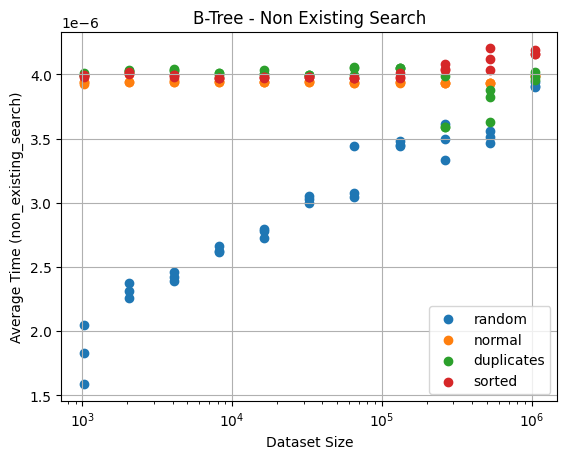

In [9]:
test_framework.plot_results_without_outliers(results, "B-Tree", repeated_times = 5)

In [8]:
# benchmarking for two-three tree about height and split frequency
test_framework = ExperimentalFramework([("Two Three Tree", TwoThreeTree)])
dataset_sizes = [2**x for x in range(10,21)]
for size in dataset_sizes.copy():
    for i in range(1, 5):
        dataset_sizes.append(size + i) 
dataset_sizes = sorted(set(dataset_sizes))
data_generator = TestDataGenerator()
generators = [data_generator.generate_dataset, data_generator.generate_dataset_normal_distribution, data_generator.generate_dateset_with_duplicates, data_generator.generate_sorted_dataset]
generator_names = ["random", "normal", "duplicates", "sorted"]
height_results = {generator_name: [] for generator_name in generator_names}
split_results = {generator_name: [] for generator_name in generator_names}
for generator, generator_name in zip(generators, generator_names):
    for size in dataset_sizes:
        dataset = generator(size)
        two_three_tree = TwoThreeTree()
        test_framework = ExperimentalFramework([("Two Three Tree", TwoThreeTree)])
        height, split_count = test_framework.benchmark_insertion_tree_height_split(two_three_tree, dataset)
        height_results[generator_name].append(height)
        split_results[generator_name].append(split_count)



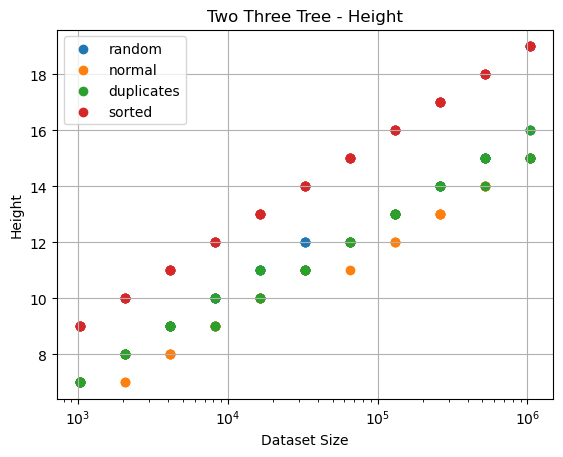

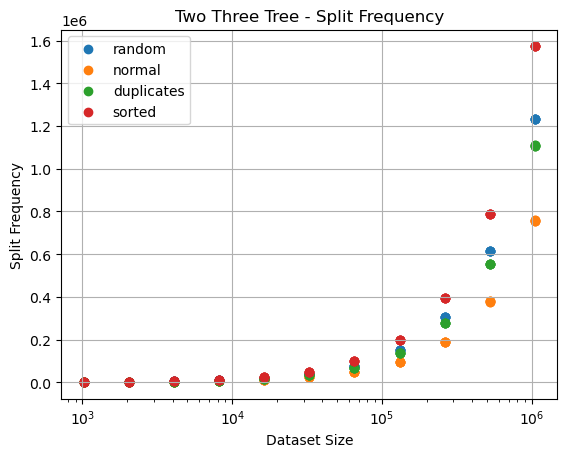

In [9]:
# Plotting height results
plt.figure()
for generator_name, heights in height_results.items():
    plt.scatter(dataset_sizes, heights, label=generator_name)
plt.xlabel("Dataset Size")
plt.xscale("log")
plt.ylabel("Height")
plt.title("Two Three Tree - Height")
plt.legend()
plt.grid()
plt.show()
# Plotting split results
plt.figure()
for generator_name, splits in split_results.items():
    plt.scatter(dataset_sizes, splits, label=generator_name)
plt.xlabel("Dataset Size")
plt.xscale("log")
plt.ylabel("Split Frequency")
plt.title("Two Three Tree - Split Frequency")
plt.legend()
plt.grid()
plt.show()